Aplicando a fronteira eficiente de Markowitz

In [57]:
import pandas as pd 
from pandas_datareader import data
import numpy as np
import matplotlib.pyplot as plt

Primeiro vamos gerar um dataframe com informações de 4 ações escolhidas. As informações vem do site Yahoo finanças. Caso deseje, basta trocar as ações por outras. Entretanto é necessário tomar cuidado com o start de cada uma delas, pois se uma for mais recente que as outras, apresentará NaN, impossibilitando a criação do gráfico e da carteira.

In [58]:
df = pd.DataFrame()
df['AMZN'] = data.DataReader('AMZN', data_source='yahoo', start='1-1-2010')['Close']
df['NFLX'] = data.DataReader('NFLX', data_source='yahoo', start='1-1-2010')['Close']
df['NVDA'] = data.DataReader('NVDA', data_source='yahoo', start='1-1-2010')['Close']
df['ITUB4.SA'] = data.DataReader('ITUB4.SA', data_source='yahoo', start='1-1-2010')['Close']

df.head()

,AMZN,NFLX,NVDA,ITUB4.SA
Date,,,,
2010-01-04,6.6950,7.640000,4.6225,18.268333
2010-01-05,6.7345,7.358571,4.6900,18.386723
2010-01-06,6.6125,7.617143,4.7200,18.227352
2010-01-07,6.5000,7.485714,4.6275,18.040663
2010-01-08,6.6760,7.614286,4.6375,17.767456


In [59]:
# Retorno simples dos ativos
df.pct_change().head()

,AMZN,NFLX,NVDA,ITUB4.SA
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.005900,-0.036836,0.014603,0.006481
2010-01-06,-0.018116,0.035139,0.006397,-0.008668
2010-01-07,-0.017013,-0.017254,-0.019597,-0.010242
2010-01-08,0.027077,0.017176,0.002161,-0.015144


Função responsável por gerar carteiras, portfólios onde os pesos de cada uma das ações será diferenciado, cria 'num_portfolios' no num_portdoi

In [60]:
def generate_wallets(df_close, num_portfolios = 10000, risk_free = 0):
    # vetores de dados
    portfolio_weights = []
    portfolio_exp_returns = []
    portfolio_vol = []
    portfolio_sharpe = []

    # retorno simples 
    r = df.pct_change()
    mean_returns = r.mean() * 252

    # matriz de covariância 
    covariance = np.cov(r[1:].T)

    for i in range(num_portfolios):
        # gerando pesos aleatórios
        k = np.random.rand(len(df.columns))
        w = k / sum (k)

        # retorno
        R = np.dot(mean_returns, w)

        # risco
        vol = np.sqrt(np.dot(w.T, np.dot(covariance, w))) * np.sqrt(252)

        # sharpe ratio
        sharpe = (R - risk_free)/vol

        portfolio_weights.append(w)
        portfolio_exp_returns.append(R)
        portfolio_vol.append(vol)
        portfolio_sharpe.append(sharpe)

    wallets = {'weights': portfolio_weights,
              'returns': portfolio_exp_returns,
              'vol':portfolio_vol,
              'sharpe': portfolio_sharpe}

    return wallets

In [61]:
def best_portfolio(wallets, method = 'sharpe_ratio'):
    vol = wallets['vol']
    sharpe = wallets['sharpe']
    weights = wallets['weights']
    returns = wallets['returns']
    
    if method == 'sharpe_ratio':

        indice = np.array(sharpe).argmax()

    elif method == 'volatility':

        indice = np.array(vol).argmin()

    elif method == 'return':

        indice = np.array(returns).argmax()

    return weights[indice]

In [62]:
def plot_efficient_frontier(wallets, method = 'sharpe_ratio'):
    vol = wallets['vol']
    returns = wallets['returns']
    sharpe = wallets['sharpe']

    if method == 'sharpe_ratio':

        indice = np.array(sharpe).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]

    elif method == 'volatility':

        indice = np.array(vol).argmin()
        y_axis = returns[indice]
        X_axis = vol[indice]

    elif method == 'return': 

        indice = np.array(returns).argmax()
        y_axis = returns[indice]
        X_axis = vol[indice]

    plt.scatter(vol, returns, c = sharpe, cmap = 'viridis')
    plt.scatter(X_axis, y_axis, c = 'red', s = 50)
    plt.title("Fronteira de Eficiência")
    plt.xlabel("Volatilidade")
    plt.ylabel("Retorno Esperado")
    plt.show()

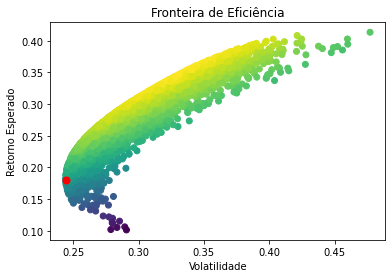

[0.36223213 0.04906521 0.08054125 0.50816141]


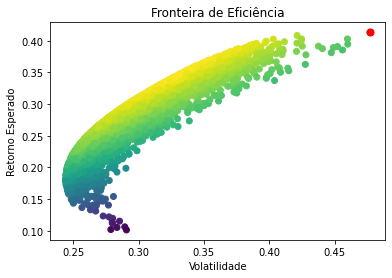

[0.02817015 0.88220574 0.08067362 0.00895049]


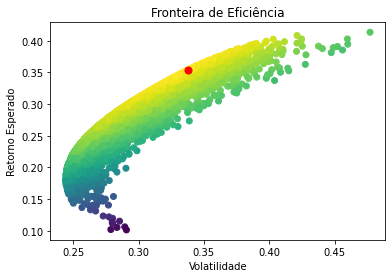

[0.296182   0.30683555 0.39043869 0.00654376]


In [63]:
wallets = generate_wallets(df)

#aqui vai devolvet a fronteira eficiente mostrando o ponto para a menor volatilidade
plot_efficient_frontier(wallets, method = 'volatility')
print(best_portfolio(wallets, method = 'volatility'))

#aqui vai devolver a fronteira eficiente mostrando o ponto para maior retorno
plot_efficient_frontier(wallets, method = "return")
print(best_portfolio(wallets, method = 'return'))

#aqui vai usar uma razão para encontrar um meio termo entre volatrilidade e retorno
plot_efficient_frontier(wallets)
print(best_portfolio(wallets))